# Pandas练习题50题

>作者：王大毛，和鲸社区
>
>出处：https://www.kesci.com/home/project/5ddc974ef41512002cec1dca
>
>修改：黄海广

Pandas 是基于 NumPy 的一种数据处理工具，该工具为了解决数据分析任务而创建。Pandas 纳入了大量库和一些标准的数据模型，提供了高效地操作大型数据集所需的函数和方法。 这些练习着重DataFrame和Series对象的基本操作，包括数据的索引、分组、统计和清洗。

## 基本操作
### 1.导入 Pandas 库并简写为 pd，并输出版本号

In [1]:
import pandas as pd
pd.__version__

'1.5.3'

### 2. 从列表创建 Series

In [2]:
arr = [0, 1, 2, 3, 4]
df = pd.Series(arr) # 如果不指定索引，则默认从 0 开始
df

0    0
1    1
2    2
3    3
4    4
dtype: int64

### 3. 从字典创建 Series

In [4]:
d = {'a':1,'b':2,'c':3,'d':4,'e':5}
df = pd.Series(d)
df

a    1
b    2
c    3
d    4
e    5
dtype: int64

### 4. 从 NumPy 数组创建 DataFrame

In [6]:
import numpy as np
dates = pd.date_range('today', periods=6)  # 定义时间序列作为 index
num_arr = np.random.randn(6, 4)  # 传入 numpy 随机数组
columns = ['A', 'B', 'C', 'D']  # 将列表作为列名
df = pd.DataFrame(num_arr, index=dates, columns=columns)
df

,A,B,C,D
2023-04-12 16:12:23.477332,0.994279,-0.250856,1.304126,-2.499782
2023-04-13 16:12:23.477332,-1.808133,0.610713,0.808506,1.033584
2023-04-14 16:12:23.477332,-0.304153,-0.270481,0.158792,1.668243
2023-04-15 16:12:23.477332,0.516400,0.008587,-0.003042,-0.606437
2023-04-16 16:12:23.477332,0.803296,-0.362814,0.617698,-0.230469
2023-04-17 16:12:23.477332,0.470109,-0.793833,0.665369,-0.351765


### 5. 从CSV中创建 DataFrame，分隔符为“；”，编码格式为gbk

### 6. 从字典对象创建DataFrame，并设置索引

In [9]:
import numpy as np
data = {
    'animal':
    ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
    'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
    'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
    'priority':
    ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']
}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
df = pd.DataFrame(data, index=labels)
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


### 7. 显示df的基础信息，包括行的数量；列名；每一列值的数量、类型

In [11]:
df.info()
# 方法二
# df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   animal    10 non-null     object 
 1   age       8 non-null      float64
 2   visits    10 non-null     int64  
 3   priority  10 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 400.0+ bytes


### 8. 展示df的前3行

In [13]:
df.iloc[:3]
# 方法二
#df.head(3)

,age,animal,priority,visits
a,2.5,cat,yes,1
b,3.0,cat,yes,3
c,0.5,snake,no,2


### 9. 取出df的animal和age列

In [15]:
# df[['animal', 'age']]
df.loc[:, ['animal', 'age']]

,animal,age
a,cat,2.5
b,cat,3.0
c,snake,0.5
d,dog,NaN
e,dog,5.0
f,cat,2.0
g,snake,4.5
h,cat,NaN
i,dog,7.0
j,dog,3.0


### 10. 取出索引为[3, 4, 8]行的animal和age列

In [17]:
df.loc[df.index[[3, 4, 8]], ['animal', 'age']]

,animal,age
d,dog,NaN
e,dog,5.0
i,dog,7.0


### 11. 取出age值大于3的行

In [18]:
df[ df['age'] > 3]

,animal,age,visits,priority
e,dog,5.0,2,no
g,snake,4.5,1,no
i,dog,7.0,2,no


### 12. 取出age值缺失的行

In [19]:
df[df['age'].isnull()]

,animal,age,visits,priority
d,dog,NaN,3,yes
h,cat,NaN,1,yes


### 13.取出age在2,4间的行（不含）

In [27]:
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


In [31]:
cond1 = df['age'] > 2
cond2 = df['age'] < 4
print(cond1, cond2)

a     True
b     True
c    False
d    False
e     True
f    False
g     True
h    False
i     True
j     True
Name: age, dtype: bool a     True
b     True
c     True
d    False
e    False
f     True
g    False
h    False
i    False
j     True
Name: age, dtype: bool


In [32]:
print( df[cond1 & cond2] )

  animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
j    dog  3.0       1       no


In [34]:
df[np.logical_and(df['age']>2, df['age'] < 4)]
# 方法二
# df[df['age'].between(2, 4)]

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
j,dog,3.0,1,no


### 14. f行的age改为1.5

In [35]:
# df.loc['f', 'age'] = 1.5
df.loc['f', 'age'] = 9999

In [37]:
df.iat[0, 3] = 2910

In [38]:
df

,animal,age,visits,priority
a,cat,2.5,1,2910
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,9999.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


### 15. 计算visits的总和

In [40]:
df['accu_visits'] = df['visits'].cumsum()
df

,animal,age,visits,priority,accu_visits
a,cat,2.5,1,2910,1
b,cat,3.0,3,yes,4
c,snake,0.5,2,no,6
d,dog,NaN,3,yes,9
e,dog,5.0,2,no,11
f,cat,9999.0,3,no,14
g,snake,4.5,1,no,15
h,cat,NaN,1,yes,16
i,dog,7.0,2,no,18
j,dog,3.0,1,no,19


<Axes: >

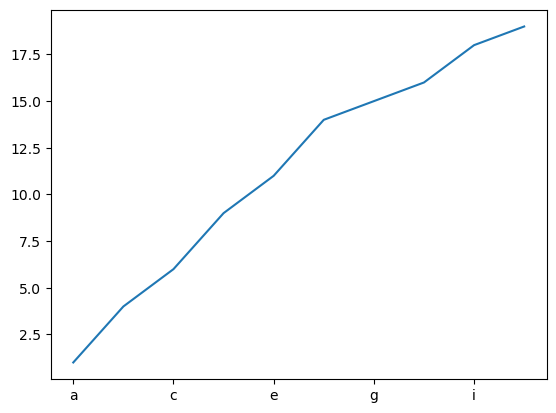

In [42]:
df['accu_visits'].plot(kind='line')

### 16. 计算每个不同种类animal的age的平均数

In [43]:
df

,animal,age,visits,priority,accu_visits
a,cat,2.5,1,2910,1
b,cat,3.0,3,yes,4
c,snake,0.5,2,no,6
d,dog,NaN,3,yes,9
e,dog,5.0,2,no,11
f,cat,9999.0,3,no,14
g,snake,4.5,1,no,15
h,cat,NaN,1,yes,16
i,dog,7.0,2,no,18
j,dog,3.0,1,no,19


In [21]:
df.groupby('animal')['age'].mean()

animal
cat      2.333333
dog      5.000000
snake    2.500000
Name: age, dtype: float64

### 17. 在df中插入新行k，然后删除该行

In [46]:
df.shape

(10, 5)

In [53]:
#插入
df.loc['k'] = [5.5, 'dog', 'no', 2, 19]
# 删除
df = df.drop('k')
df


,animal,age,visits,priority,accu_visits
a,cat,2.5,1,2910,1
b,cat,3.0,3,yes,4
c,snake,0.5,2,no,6
d,dog,NaN,3,yes,9
e,dog,5.0,2,no,11
f,cat,9999.0,3,no,14
g,snake,4.5,1,no,15
h,cat,NaN,1,yes,16
i,dog,7.0,2,no,18
j,dog,3.0,1,no,19


### 18. 计算df中每个种类animal的数量

In [54]:
df['animal'].value_counts()

cat      4
dog      4
snake    2
Name: animal, dtype: int64

### 19. 先按age降序排列，后按visits升序排列

In [24]:
df.sort_values(by=['age', 'visits'], ascending=[False, True])

,age,animal,priority,visits
i,7.0,dog,no,2
e,5.0,dog,no,2
g,4.5,snake,no,1
j,3.0,dog,no,1
b,3.0,cat,yes,3
a,2.5,cat,yes,1
f,1.5,cat,no,3
c,0.5,snake,no,2
h,NaN,cat,yes,1
d,NaN,dog,yes,3


### 20. 将priority列中的yes, no替换为布尔值True, False @vmap

In [56]:
df.shape

(10, 5)

In [69]:
# df['priority'] = df['priority'].map({'yes': True, 'no': False})
df['slope'] = np.random.randn(df.shape[0])
def callback (x):
    if x > 0.2:
        return 'up'
    elif x < -0.2:
        return 'down'
    else:
        return 'flat'
df['context'] = df['slope'].apply(callback)

In [70]:
df

,animal,age,visits,priority,accu_visits,slope,context
a,cat,2.5,1,NaN,1,-0.207866,down
b,cat,3.0,3,NaN,4,1.017710,up
c,snake,0.5,2,NaN,6,-0.211111,down
d,dog,NaN,3,NaN,9,0.882933,up
e,dog,5.0,2,NaN,11,0.174358,flat
f,cat,9999.0,3,NaN,14,-0.049604,flat
g,snake,4.5,1,NaN,15,0.302115,up
h,cat,NaN,1,NaN,16,0.407208,up
i,dog,7.0,2,NaN,18,0.475616,up
j,dog,3.0,1,NaN,19,-1.738662,down


### 21. 将animal列中的snake替换为python

In [72]:
df['animal'] = df['animal'].replace('snake', 'python')
df.drop('priority', axis=1, inplace=True)

### 22. 对每种animal的每种不同数量visits，计算平均age，即，返回一个表格，行是aniaml种类，列是visits数量，表格值是行动物种类列访客数量的平均年龄

In [74]:
df.pivot_table(index='animal', columns='visits', values='age', aggfunc='mean')

visits,1,2,3
animal,,,
cat,2.5,NaN,5001.0
dog,3.0,6.0,NaN
python,4.5,0.5,NaN


### 进阶操作
### 23. 有一列整数列A的DatraFrame，删除数值重复的行

In [76]:
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
print(df)
# df1 = df.loc[df['A'].shift() != df['A']]
# 方法二
df1 = df.drop_duplicates(subset='A')
print(df1)

    A
0   1
1   2
2   2
3   3
4   4
5   5
6   5
7   5
8   6
9   7
10  7
   A
0  1
1  2
3  3
4  4
5  5
8  6
9  7


### 24. 一个全数值DatraFrame，每个数字减去该行的平均数

In [77]:
df = pd.DataFrame(np.random.random(size=(5, 3)))
print(df)
df1 = df.sub(df.mean(axis=1), axis=0)
print(df1)

          0         1         2
0  0.304883  0.088799  0.551531
1  0.723783  0.251026  0.707964
2  0.192500  0.806329  0.953383
3  0.888292  0.312161  0.196429
4  0.156123  0.269499  0.011740
          0         1         2
0 -0.010188 -0.226272  0.236460
1  0.162859 -0.309898  0.147039
2 -0.458238  0.155591  0.302646
3  0.422665 -0.153466 -0.269198
4  0.010336  0.123712 -0.134047


### 25. 一个有5列的DataFrame，求哪一列的和最小

In [79]:
df = pd.DataFrame(np.random.random(size=(5, 5)), columns=list('abcde'))
print(df)
# df.sum(axis=1).idxmin() # 行
df.sum(axis = 0).idxmin() # 列

          a         b         c         d         e
0  0.075739  0.119932  0.559616  0.079401  0.471605
1  0.461338  0.641745  0.676475  0.541191  0.600247
2  0.965280  0.837017  0.776705  0.236066  0.958575
3  0.071761  0.182220  0.075315  0.850814  0.361141
4  0.275080  0.788450  0.714962  0.092149  0.863218


'd'

### 26. 给定DataFrame，求A列每个值的前3大的B的值的和

In [80]:
df = pd.DataFrame({'A': list('aaabbcaabcccbbc'), 
                   'B': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})
print(df)
df1 = df.groupby('A')['B'].nlargest(3).sum(level=0)
print(df1)

    A    B
0   a   12
1   a  345
2   a    3
3   b    1
4   b   45
5   c   14
6   a    4
7   a   52
8   b   54
9   c   23
10  c  235
11  c   21
12  b   57
13  b    3
14  c   87
A
a    409
b    156
c    345
Name: B, dtype: int64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_19076\3605881006.py:4: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  df1 = df.groupby('A')['B'].nlargest(3).sum(level=0)


### 27. 给定DataFrame，有列A, B，A的值在1-100（含），对A列每10步长，求对应的B的和

In [81]:
df = pd.DataFrame({
    'A': [1, 2, 11, 11, 33, 34, 35, 40, 79, 99],
    'B': [1, 2, 11, 11, 33, 34, 35, 40, 79, 99]
})
print(df)

    A   B
0   1   1
1   2   2
2  11  11
3  11  11
4  33  33
5  34  34
6  35  35
7  40  40
8  79  79
9  99  99


In [82]:
df1 = df.groupby(pd.cut(df['A'], np.arange(0, 101, 10)))['B'].sum()
print(df1)


A
(0, 10]        3
(10, 20]      22
(20, 30]       0
(30, 40]     142
(40, 50]       0
(50, 60]       0
(60, 70]       0
(70, 80]      79
(80, 90]       0
(90, 100]     99
Name: B, dtype: int64


### 28. 给定DataFrame，计算每个元素至左边最近的0（或者至开头）的距离，生成新列y

### approach 1

In [20]:
df

,X,Y
0,7,1
1,2,2
2,0,0
3,3,1
4,4,2
5,2,3
6,5,4
7,0,0
8,3,1
9,4,2


In [6]:
# 方法一
x = (df['X'] != 0).cumsum() # cumsum() 累加 Series[bool] -> Series[int]
print(x, type(x))

0    1
1    2
2    2
3    3
4    4
5    5
6    6
7    6
8    7
9    8
Name: X, dtype: int32 <class 'pandas.core.series.Series'>


In [10]:
df['Y'] = y.groupby((y != y.shift()).cumsum()).cumsum()
print(df)

   X  Y
0  7  1
1  2  2
2  0  0
3  3  1
4  4  2
5  2  3
6  5  4
7  0  0
8  3  1
9  4  2


### approach 2

In [22]:
# 方法二
df['Y'] = df.groupby((df['X'] == 0).cumsum()).cumcount()
first_zero_idx = (df['X'] == 0).idxmax()
df['Y'].iloc[0:first_zero_idx] += 1
print(df)

   X  Y
0  7  1
1  2  2
2  0  0
3  3  1
4  4  2
5  2  3
6  5  4
7  0  0
8  3  1
9  4  2


### 29. 一个全数值的DataFrame，返回最大3个值的坐标

In [23]:
df = pd.DataFrame(np.random.random(size=(5, 3)))
print(df)


          0         1         2
0  0.849460  0.350187  0.522466
1  0.546432  0.600197  0.193157
2  0.480518  0.431733  0.201002
3  0.804707  0.728441  0.122368
4  0.627967  0.012903  0.786906


In [31]:
unstack = df.unstack()
print(type(unstack), '\n', unstack)

<class 'pandas.core.series.Series'> 
 0  0    0.849460
   1    0.546432
   2    0.480518
   3    0.804707
   4    0.627967
1  0    0.350187
   1    0.600197
   2    0.431733
   3    0.728441
   4    0.012903
2  0    0.522466
   1    0.193157
   2    0.201002
   3    0.122368
   4    0.786906
dtype: float64


In [32]:
unstack.sort_values()[-3:].index.tolist()

[(2, 4), (0, 3), (0, 0)]

### 30. 给定DataFrame，将负值代替为同组的平均值

In [43]:
df = pd.DataFrame({
    'grps':
    list('aaabbcaabcccbbc'),
    'vals': [-12, 345, 3, 1, 45, 14, 4, -52, 54, 23, -235, 21, 57, 3, 87]
})
print(df)

   grps  vals
0     a   -12
1     a   345
2     a     3
3     b     1
4     b    45
5     c    14
6     a     4
7     a   -52
8     b    54
9     c    23
10    c  -235
11    c    21
12    b    57
13    b     3
14    c    87


In [41]:
def replace(group):
    mask = group < 0
    group[mask] = group[~mask].mean()
    return group

In [45]:
df['vals'] = df.groupby(['grps'])['vals'].transform(replace)
print(df)

   grps        vals
0     a  117.333333
1     a  345.000000
2     a    3.000000
3     b    1.000000
4     b   45.000000
5     c   14.000000
6     a    4.000000
7     a  117.333333
8     b   54.000000
9     c   23.000000
10    c   36.250000
11    c   21.000000
12    b   57.000000
13    b    3.000000
14    c   87.000000


### 31. 计算3位滑动窗口的平均值，忽略NAN

In [47]:
df = pd.DataFrame({
    'group': list('aabbabbbabab'),
    'value': [1, 2, 3, np.nan, 2, 3, np.nan, 1, 7, 3, np.nan, 8]
})
print(df)

   group  value
0      a    1.0
1      a    2.0
2      b    3.0
3      b    NaN
4      a    2.0
5      b    3.0
6      b    NaN
7      b    1.0
8      a    7.0
9      b    3.0
10     a    NaN
11     b    8.0


In [48]:
g1 = df.groupby(['group'])['value']
g2 = df.fillna(0).groupby(['group'])['value']

s = g2.rolling(3, min_periods=1).sum() / g1.rolling(3, min_periods=1).count()
s.reset_index(level=0, drop=True).sort_index()


0     1.000000
1     1.500000
2     3.000000
3     3.000000
4     1.666667
5     3.000000
6     3.000000
7     2.000000
8     3.666667
9     2.000000
10    4.500000
11    4.000000
Name: value, dtype: float64

## Series 和 Datetime索引
### 32. 创建Series s，将2015所有工作日作为随机值的索引

In [50]:
dti = pd.date_range(start='2015-01-01', end='2015-12-31', freq='B') 
s = pd.Series(np.random.rand(len(dti)), index=dti)

s.head(10)

2015-01-01    0.356207
2015-01-02    0.928679
2015-01-05    0.459830
2015-01-06    0.182097
2015-01-07    0.468916
2015-01-08    0.203646
2015-01-09    0.002457
2015-01-12    0.829123
2015-01-13    0.609316
2015-01-14    0.818744
Freq: B, dtype: float64

### 33. 所有礼拜三的值求和

In [52]:
print(type(s.index), s.index)

<class 'pandas.core.indexes.datetimes.DatetimeIndex'> DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-05', '2015-01-06',
               '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-12',
               '2015-01-13', '2015-01-14',
               ...
               '2015-12-18', '2015-12-21', '2015-12-22', '2015-12-23',
               '2015-12-24', '2015-12-25', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', length=261, freq='B')


In [53]:
s.index.weekday

Int64Index([3, 4, 0, 1, 2, 3, 4, 0, 1, 2,
            ...
            4, 0, 1, 2, 3, 4, 0, 1, 2, 3],
           dtype='int64', length=261)

In [54]:
s[s.index.weekday == 2].sum()

25.774174343445882

### 34. 求每个自然月的平均数

In [55]:
s.resample('M').mean()

2015-01-31    0.529839
2015-02-28    0.565921
2015-03-31    0.481122
2015-04-30    0.498851
2015-05-31    0.594028
2015-06-30    0.459949
2015-07-31    0.496720
2015-08-31    0.455567
2015-09-30    0.557592
2015-10-31    0.566700
2015-11-30    0.563466
2015-12-31    0.452990
Freq: M, dtype: float64

### 35. 每连续4个月为一组，求最大值所在的日期

In [57]:
s.groupby(pd.Grouper(freq='4M')).idxmax()

2015-01-31   2015-01-21
2015-05-31   2015-04-24
2015-09-30   2015-09-10
2016-01-31   2015-11-18
Freq: 4M, dtype: datetime64[ns]

### 36. 创建2015-2016每月第三个星期四的序列

In [42]:
pd.date_range('2015-01-01', '2016-12-31', freq='WOM-3THU')
#数据清洗
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})
df

,Airline,FlightNumber,From_To,RecentDelays
0,KLM(!),10045.0,LoNDon_paris,"[23, 47]"
1,<Air France> (12),NaN,MAdrid_miLAN,[]
2,(British Airways. ),10065.0,londON_StockhOlm,"[24, 43, 87]"
3,12. Air France,NaN,Budapest_PaRis,[13]
4,"""Swiss Air""",10085.0,Brussels_londOn,"[67, 32]"


### 37. FlightNumber列中有些值缺失了，他们本来应该是每一行增加10，填充缺失的数值，并且令数据类型为整数

In [43]:
df['FlightNumber'] = df['FlightNumber'].interpolate().astype(int)
df

,Airline,FlightNumber,From_To,RecentDelays
0,KLM(!),10045,LoNDon_paris,"[23, 47]"
1,<Air France> (12),10055,MAdrid_miLAN,[]
2,(British Airways. ),10065,londON_StockhOlm,"[24, 43, 87]"
3,12. Air France,10075,Budapest_PaRis,[13]
4,"""Swiss Air""",10085,Brussels_londOn,"[67, 32]"


### 38. 将From_To列从_分开，分成From, To两列，并删除原始列

In [44]:
temp = df.From_To.str.split('_', expand=True)
temp.columns = ['From', 'To']
df = df.join(temp)
df = df.drop('From_To', axis=1)
df

,Airline,FlightNumber,RecentDelays,From,To
0,KLM(!),10045,"[23, 47]",LoNDon,paris
1,<Air France> (12),10055,[],MAdrid,miLAN
2,(British Airways. ),10065,"[24, 43, 87]",londON,StockhOlm
3,12. Air France,10075,[13],Budapest,PaRis
4,"""Swiss Air""",10085,"[67, 32]",Brussels,londOn


### 39. 将From, To大小写统一首字母大写其余小写

In [45]:
df['From'] = df['From'].str.capitalize()
df['To'] = df['To'].str.capitalize()
df

,Airline,FlightNumber,RecentDelays,From,To
0,KLM(!),10045,"[23, 47]",London,Paris
1,<Air France> (12),10055,[],Madrid,Milan
2,(British Airways. ),10065,"[24, 43, 87]",London,Stockholm
3,12. Air France,10075,[13],Budapest,Paris
4,"""Swiss Air""",10085,"[67, 32]",Brussels,London


### 40. Airline列，有一些多余的标点符号，需要提取出正确的航司名称。举例：'(British Airways. )' 应该改为 'British Airways'.

In [46]:
df['Airline'] = df['Airline'].str.extract(
    '([a-zA-Z\s]+)', expand=False).str.strip()
df

,Airline,FlightNumber,RecentDelays,From,To
0,KLM,10045,"[23, 47]",London,Paris
1,Air France,10055,[],Madrid,Milan
2,British Airways,10065,"[24, 43, 87]",London,Stockholm
3,Air France,10075,[13],Budapest,Paris
4,Swiss Air,10085,"[67, 32]",Brussels,London


### 41. Airline列，数据被以列表的形式录入，但是我们希望每个数字被录入成单独一列，delay_1, delay_2, ...没有的用NAN替代。

In [58]:
delays = df['RecentDelays'].apply(pd.Series)
delays.columns = ['delay_{}'.format(n) for n in range(1, len(delays.columns)+1)]
df = df.drop('RecentDelays', axis=1).join(delays)
df

KeyError: 'RecentDelays'

## 层次化索引
### 42. 用 letters = ['A', 'B', 'C']和 numbers = list(range(10))的组合作为系列随机值的层次化索引

In [59]:
letters = ['A', 'B', 'C']
numbers = list(range(8))

mi = pd.MultiIndex.from_product([letters, numbers])
s = pd.Series(np.random.rand(24), index=mi)
s

A  0    0.047709
   1    0.513371
   2    0.900515
   3    0.615297
   4    0.642561
   5    0.127845
   6    0.266681
   7    0.349448
B  0    0.873171
   1    0.137061
   2    0.297417
   3    0.795088
   4    0.845406
   5    0.050368
   6    0.783895
   7    0.673234
C  0    0.433817
   1    0.234393
   2    0.848569
   3    0.643644
   4    0.010620
   5    0.304651
   6    0.406208
   7    0.146914
dtype: float64

### 43. 检查s是否是字典顺序排序的

In [60]:
s.index.is_lexsorted()
# 方法二
# s.index.lexsort_depth == s.index.nlevels

C:\Users\Administrator\AppData\Local\Temp\ipykernel_23060\2308324232.py:1: FutureWarning: MultiIndex.is_lexsorted is deprecated as a public function, users should use MultiIndex.is_monotonic_increasing instead.
  s.index.is_lexsorted()


True

### 44. 选择二级索引为1, 3的行

In [62]:
s.shape

(24,)

In [61]:
s.loc[:, [1, 3]]

A  1    0.513371
   3    0.615297
B  1    0.137061
   3    0.795088
C  1    0.234393
   3    0.643644
dtype: float64

### 45. 对s进行切片操作，取一级索引至B，二级索引从2开始到最后

In [67]:
s.shape

(24,)

In [65]:
s.loc[pd.IndexSlice[:'B', 2:]] 

A  2    0.900515
   3    0.615297
   4    0.642561
   5    0.127845
   6    0.266681
   7    0.349448
B  2    0.297417
   3    0.795088
   4    0.845406
   5    0.050368
   6    0.783895
   7    0.673234
dtype: float64

### 46. 计算每个一级索引的和（A, B, C每一个的和）

In [68]:
s

A  0    0.047709
   1    0.513371
   2    0.900515
   3    0.615297
   4    0.642561
   5    0.127845
   6    0.266681
   7    0.349448
B  0    0.873171
   1    0.137061
   2    0.297417
   3    0.795088
   4    0.845406
   5    0.050368
   6    0.783895
   7    0.673234
C  0    0.433817
   1    0.234393
   2    0.848569
   3    0.643644
   4    0.010620
   5    0.304651
   6    0.406208
   7    0.146914
dtype: float64

In [69]:
unstack = s.unstack()
print(unstack.shape)
unstack

(3, 8)


,0,1,2,3,4,5,6,7
A,0.047709,0.513371,0.900515,0.615297,0.642561,0.127845,0.266681,0.349448
B,0.873171,0.137061,0.297417,0.795088,0.845406,0.050368,0.783895,0.673234
C,0.433817,0.234393,0.848569,0.643644,0.010620,0.304651,0.406208,0.146914


In [73]:
# s.sum(level=0)
# 方法二
s.unstack().sum(axis='columns') # operation across columns

A    3.463428
B    4.455640
C    3.028816
dtype: float64

### 47. 交换索引等级，新的Series是字典顺序吗？不是的话请排序

In [53]:
new_s = s.swaplevel(0, 1)
print(new_s)
print(new_s.index.is_lexsorted())
new_s = new_s.sort_index()
print(new_s)

0  A    0.250785
1  A    0.146978
2  A    0.596062
3  A    0.064608
0  B    0.709660
1  B    0.515778
2  B    0.483163
3  B    0.524490
0  C    0.360434
1  C    0.987620
2  C    0.527151
3  C    0.636960
dtype: float64
False
0  A    0.250785
   B    0.709660
   C    0.360434
1  A    0.146978
   B    0.515778
   C    0.987620
2  A    0.596062
   B    0.483163
   C    0.527151
3  A    0.064608
   B    0.524490
   C    0.636960
dtype: float64


In [54]:
## 可视化
import matplotlib.pyplot as plt
df = pd.DataFrame({"xs": [1, 5, 2, 8, 1], "ys": [4, 2, 1, 9, 6]})
plt.style.use('ggplot')

### 48. 画出df的散点图

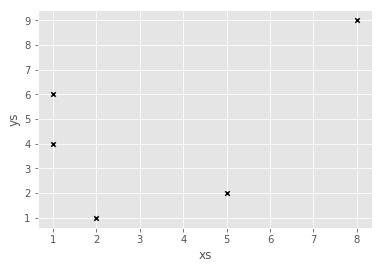

In [55]:
df.plot.scatter("xs", "ys", color = "black", marker = "x")

### 49. 可视化指定4维DataFrame

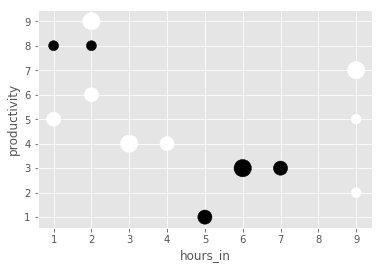

In [56]:
df = pd.DataFrame({
    "productivity": [5, 2, 3, 1, 4, 5, 6, 7, 8, 3, 4, 8, 9],
    "hours_in": [1, 9, 6, 5, 3, 9, 2, 9, 1, 7, 4, 2, 2],
    "happiness": [2, 1, 3, 2, 3, 1, 2, 3, 1, 2, 2, 1, 3],
    "caffienated": [0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0]
})

df.plot.scatter(
    "hours_in", "productivity", s=df.happiness * 100, c=df.caffienated)

### 50. 在同一个图中可视化2组数据，共用X轴，但y轴不同

In [74]:
df = pd.DataFrame({
    "revenue": [57, 68, 63, 71, 72, 90, 80, 62, 59, 51, 47, 52],
    "advertising":
    [2.1, 1.9, 2.7, 3.0, 3.6, 3.2, 2.7, 2.4, 1.8, 1.6, 1.3, 1.9],
    "month":
    range(12)
})

print(df)

    revenue  advertising  month
0        57          2.1      0
1        68          1.9      1
2        63          2.7      2
3        71          3.0      3
4        72          3.6      4
5        90          3.2      5
6        80          2.7      6
7        62          2.4      7
8        59          1.8      8
9        51          1.6      9
10       47          1.3     10
11       52          1.9     11


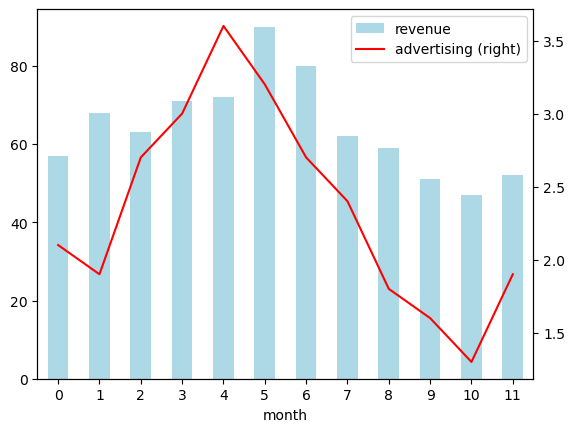

In [75]:
ax = df.plot.bar("month", "revenue", color="lightblue")
df.plot.line("month", "advertising", color="red", ax=ax, secondary_y=True)
ax.set_xlim = (-0.5, 11.5)
